# Lecture 2_2: The Wright-Fisher Model

## Example 2.4: WF Model without mutation
**1. Consider a population with $N=6$ haploid individuals, what does the transition probability matrix look like?** 

We start by defining a **function** that creates the transition matrix.

In [4]:
import numpy as np

def wright_fisher_transition_matrix(N):
    """
    Generate the transition probability matrix for the Wright-Fisher model.

    Parameters:
    - N: Population size

    Returns:
    - P: Transition probability matrix
    """

    P = np.zeros((N+1, N+1)) #Matrix of 0s

    for i in range(N+1):
        for j in range(N+1):
            P[i, j] = (np.math.comb(N, j) * ((i/N) ** j) * ((1 - i/N) ** (N - j)))

    return P

# Example usage with population size N = 6
t_matrix_6 = wright_fisher_transition_matrix(6)

# Print the transition matrix
print("Wright-Fisher Transition Probability Matrix:")
print(transition_matrix)


Wright-Fisher Transition Probability Matrix:
[[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [3.34897977e-01 4.01877572e-01 2.00938786e-01 5.35836763e-02
  8.03755144e-03 6.43004115e-04 2.14334705e-05]
 [8.77914952e-02 2.63374486e-01 3.29218107e-01 2.19478738e-01
  8.23045267e-02 1.64609053e-02 1.37174211e-03]
 [1.56250000e-02 9.37500000e-02 2.34375000e-01 3.12500000e-01
  2.34375000e-01 9.37500000e-02 1.56250000e-02]
 [1.37174211e-03 1.64609053e-02 8.23045267e-02 2.19478738e-01
  3.29218107e-01 2.63374486e-01 8.77914952e-02]
 [2.14334705e-05 6.43004115e-04 8.03755144e-03 5.35836763e-02
  2.00938786e-01 4.01877572e-01 3.34897977e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 1.00000000e+00]]


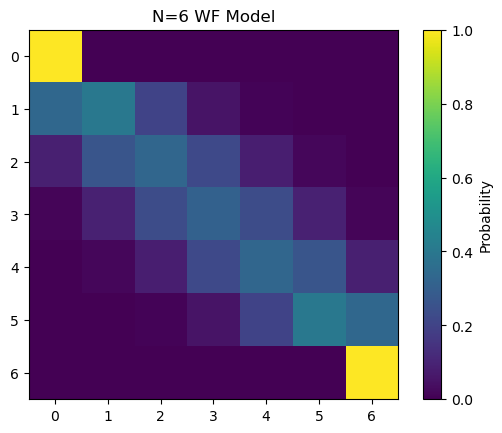

In [5]:
import matplotlib.pyplot as plt

# Create heatmap
plt.imshow(t_matrix_6, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Probability')
plt.title('N=6 WF Model')
plt.show()


**2. Suppose that the population starts with an allele frequency of $p=0.5$, what is the probability that the frequency is $p=0.5$ in the next generation?** 

In [9]:
vec_p0=[[0,0,0,1,0,0,0]];
vec_p0@t_matrix_6

array([[0.015625, 0.09375 , 0.234375, 0.3125  , 0.234375, 0.09375 ,
        0.015625]])

There is a 31% there is a frequency of $p=0.5$ in the next generation

## Example 2.5:

**1. In a haploid WF with $N$ gene copies, characterize the states of the WF model as absorbing, transient, or recursive.**

Plotting the 5-step transition porbability matrix:

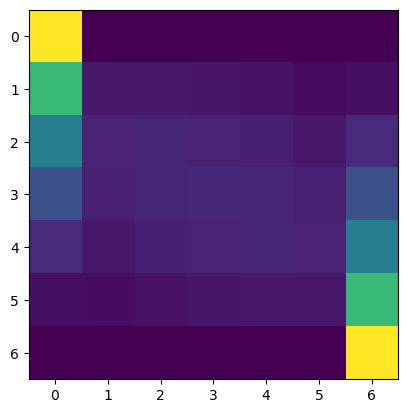

In [8]:
from numpy.linalg import matrix_power
plt.imshow(matrix_power(t_matrix_6, 5));

There are clearly two absorbing states as indicated by the buildup of probability in the first and last columns.

## Example 2.6

**Consider a population with $N=6$ haploid individuals with mutation probabilities $u=v=0.05$**

**1. What does the transition probability matrix look like?** 

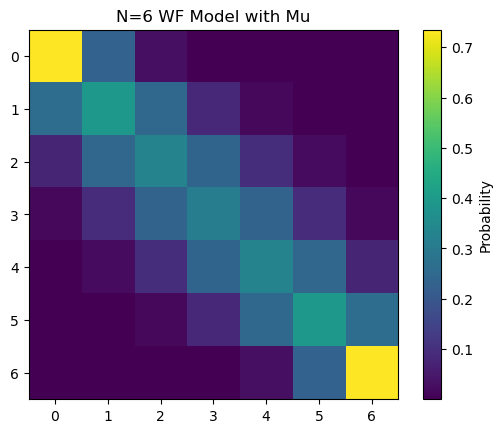

In [11]:
def wright_fisher_mu_transition_matrix(N,u,v):
    """
    Generate the transition probability matrix for the Wright-Fisher model.

    Parameters:
    - N: Population size
    - u: mutation rate from 'A'->'a'
    - v: mutation rate from 'a'->'A'

    Returns:
    - P: Transition probability matrix
    """

    P = np.zeros((N+1, N+1)) #Matrix of 0s

    for i in range(N+1):
        for j in range(N+1):
            x=i/N*(1-u)+(1 - i/N)*v
            y=i/N*(u)+(1 - i/N)*(1-v)
            P[i, j] = (np.math.comb(N, j) * (x ** j) * (y ** (N - j)))

    return P

# Example usage with population size N = 6
t_matrix_mu_6 = wright_fisher_mu_transition_matrix(6,0.05,0.05)

plt.imshow(t_matrix_mu_6, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Probability')
plt.title('N=6 WF Model with Mu')
plt.show()


## Example 2.7

**Consider a population with $N=6$ haploid individuals and no mutation that starts with an allele frequency of $p(0)=0.5$**

4. **Plot a heat map showing the dynamics over time.**

Let's define a function that gives us the state vector in generation $g$:

In [38]:
import math
def wf_state(N,gMax):
    """
    Calclulates the state of the WF model witha population size of N between 
    generation 0 and generation gMax assuming that the system starts with 
    an allele frequency of ~0.5.

    Parameters:
    - N: Population size
    - u: mutation rate from 'A'->'a'
    - v: mutation rate from 'a'->'A'

    Returns:
    - P: Transition probability matrix
    """
    vec0=np.transpose(np.zeros(N+1))
    vec0[math.floor(N/2)]=1
    vecTemp=vec0
    out=vec0
    
    t_matrix = wright_fisher_transition_matrix(N)
    
    for g in range(0,gMax):
        vecTemp=vecTemp@t_matrix
        out = np.vstack((out, vecTemp))
        
    return np.transpose(out)


In [42]:
wf_state(6,3)

array([[0.        , 0.015625  , 0.07280414, 0.1373886 ],
       [0.        , 0.09375   , 0.1326196 , 0.12609281],
       [0.        , 0.234375  , 0.18928434, 0.15496474],
       [1.        , 0.3125    , 0.21058385, 0.16310772],
       [0.        , 0.234375  , 0.18928434, 0.15496474],
       [0.        , 0.09375   , 0.1326196 , 0.12609281],
       [0.        , 0.015625  , 0.07280414, 0.1373886 ]])

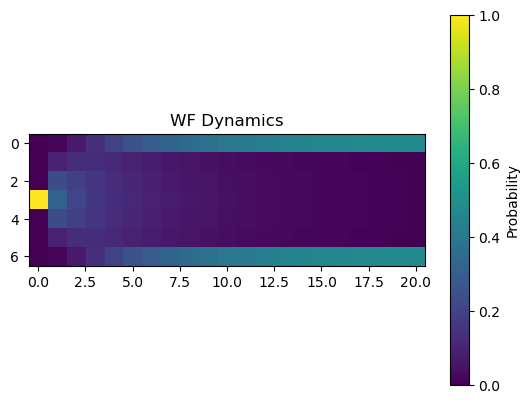

In [43]:
plt.imshow(wf_state(6,20), cmap='viridis', interpolation='nearest')
plt.colorbar(label='Probability')
plt.title('WF Dynamics')
plt.show()

## Example 2.8:

**In the (haploid) WF model without mutation, we have two absorbing states $x=0$ and $x=N=6$.  What is the probability that the $A$ allele fixes given that we start with an allele frequency of $0.5$?**

We have a system of equations:

$$
h(i)=\begin{cases}
h(0)=0\\
h(i)=\sum_{j=0}^N \binom{N}{j} \left(\frac{i}{N}\right)^j \left(\frac{N-i}{N}\right)^{N-j}h(j)& \forall i=\{1,\dots, N-1\}\\
h(N)=1
\end{cases}
$$

Writing this in matrix form we have:

$$
\mathbf{A}x+b=x
$$

where $\mathbf{A}_{i,j}=\binom{N}{j} \left(\frac{i}{N}\right)^j \left(\frac{N-i}{N}\right)^{N-j}\quad i={1,2,\dots, N-1}, \&\, j={1,2,\dots, N-1}$ 

and $b=\left(\frac{i}{N}\right)^N \quad i={1,2,\dots, N-1}$

Solving we have

$$
\begin{aligned}
(\mathbf{A}-\mathbf{I})x=-b\\
x=(\mathbf{A}-\mathbf{I})^{-1}(-b)
\end{aligned}
$$

In [83]:
def mtrxA(N):

    P = np.zeros((N-1, N-1)) #Matrix of 0s
    for i in range(N-1):
        for j in range(N-1):
            x=i+1;y=j+1;
            P[i,j] = (np.math.comb(N, y) * ((x/N) ** y) * ((1 - x/N) ** (N - y)))

    return P
def vecMinb(N):
    P = np.zeros(N-1)
    for i in range(N-1):
        x=i+1
        P[i]=-((x/N) ** N)
    return P

In [87]:
np.linalg.inv((mtrxA(6)-np.eye(5)))@vecMinb(6)

array([0.16666667, 0.33333333, 0.5       , 0.66666667, 0.83333333])

## Example 2.9:

**What is the time to fixation/loss in the WF model with population size $N$ given you start with an allele frequency or $p(0)=0.5$?**

We have the equations:

$$
g(i)=\begin{cases}
0 & i=0\& i=6\\
1+ \sum_j \binom{N}{j} \left(\frac{i}{N}\right)^j \left(\frac{N-i}{N}\right)^{N-j}g(j)
\end{cases}
$$

Written in matrix form then we have:

$$
\mathbf{A}x=x-1
$$

Where $$\mathbf{A}_{ij}=\binom{N}{j} \left(\frac{i}{N}\right)^j \left(\frac{N-i}{N}\right)^{N-j}$$

Solvling we have:

$$
x=(\mathbf{A}-\mathbf{I})^{-1}.(-1)
$$

In [91]:
def mtrxA(N):

    P = np.zeros((N-1, N-1)) #Matrix of 0s
    for i in range(N-1):
        for j in range(N-1):
            x=i+1;y=j+1;
            P[i,j] = (np.math.comb(N, y) * ((x/N) ** y) * ((1 - x/N) ** (N - y)))

    return P
def vecTemp(N):
    return np.ones(N-1)*(-1)

In [93]:
np.linalg.inv((mtrxA(6)-np.eye(5)))@vecTemp(6)

array([4.62300056, 6.58484045, 7.20502773, 6.58484045, 4.62300056])